In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Task 1

a)

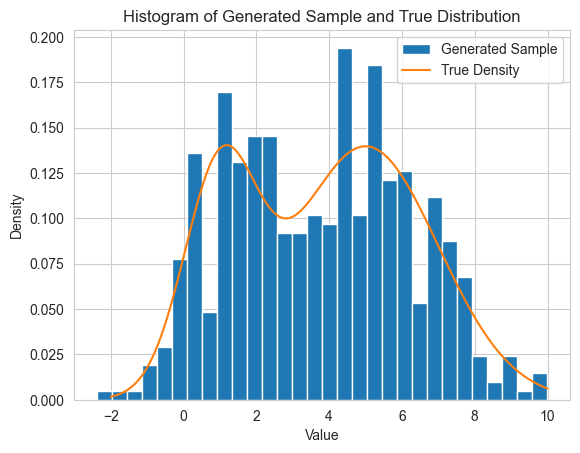

In [2]:
n = 500
pi0 = 0.3
pi1 = 0.7
mu0 = 1
mu1 = 5
sigma0 = 1
sigma1 = 2

G = np.random.choice([0, 1], size=n, p=[pi0, pi1])
X = np.where(G == 0, np.random.normal(mu0, sigma0, n), np.random.normal(mu1, sigma1, n))

plt.hist(X, bins=30, density=True, label='Generated Sample')
x_range = np.linspace(-2, 10, 1000)
true_density = pi0 * norm.pdf(x_range, mu0, sigma0) + pi1 * norm.pdf(x_range, mu1, sigma1)
plt.plot(x_range, true_density, label='True Density')

plt.title('Histogram of Generated Sample and True Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

b)

$$
\[ \log \mathcal{L}(\theta) = \sum_{i=1}^{n} \log p(x_i, G_i = g_i | \theta) \]
$$


In [3]:
def log_likelihood(x, mu0, sigma0, mu1, sigma1, pi0, pi1):
    return np.sum(np.log(pi0 * norm.pdf(x, mu0, sigma0) + pi1 * norm.pdf(x, mu1, sigma1)))


c)

$$
\[ \gamma_i = \mathbb{E}[G_i | X_i = x_i, \theta] = \frac{\pi_0 \cdot \mathcal{N}(x_i | \mu_0, \sigma_0^2)}{\pi_0 \cdot \mathcal{N}(x_i | \mu_0, \sigma_0^2) + \pi_1 \cdot \mathcal{N}(x_i | \mu_1, \sigma_1^2)} \]
$$

In [4]:
def compute_gamma(x, mu0, sigma0, mu1, sigma1, pi0, pi1):
    num = pi0 * norm.pdf(x, mu0, sigma0)
    denom = num + pi1 * norm.pdf(x, mu1, sigma1)
    return num / denom

d)

In [5]:
def update_parameters(X, gamma):
    mu0_hat = np.sum(gamma * X) / np.sum(gamma)
    mu1_hat = np.sum((1 - gamma) * X) / np.sum(1 - gamma)
    
    sigma0_hat = np.sqrt(np.sum(gamma * (X - mu0_hat)**2) / np.sum(gamma))
    sigma1_hat = np.sqrt(np.sum((1 - gamma) * (X - mu1_hat)**2) / np.sum(1 - gamma))
    
    pi0_hat = np.mean(gamma)
    pi1_hat = 1 - pi0_hat
    return mu0_hat, mu1_hat, sigma0_hat, sigma1_hat, pi0_hat, pi1_hat

e)

In [6]:
mu0_hat = np.random.rand()
mu1_hat = np.random.rand() + 4
sigma0_hat = np.random.rand()
sigma1_hat = np.random.rand() + 1
pi0_hat = 0.5
pi1_hat = 0.5

tolerance = 1e-6
max_iter = 1000
log_likelihood_values = []

for iteration in range(max_iter):
    gamma = compute_gamma(X, mu0_hat, sigma0_hat, mu1_hat, sigma1_hat, pi0_hat, pi1_hat)
    
    mu0_hat, mu1_hat, sigma0_hat, sigma1_hat, pi0_hat, pi1_hat = update_parameters(X, gamma)
    
    current_log_likelihood = log_likelihood(X, mu0_hat, sigma0_hat, mu1_hat, sigma1_hat, pi0_hat, pi1_hat)
    log_likelihood_values.append(current_log_likelihood)
    
    if iteration > 0 and abs(log_likelihood_values[-1] - log_likelihood_values[-2]) < tolerance:
        break

print(f'Converged in {iteration}')
print(f'Estimated parameters: mu0={mu0_hat}, mu1={mu1_hat}, sigma0={sigma0_hat}, sigma1={sigma1_hat}, pi0={pi0_hat}, pi1={pi1_hat}')


Converged in 146 iterations
Estimated parameters: mu0=1.262406147812649, mu1=5.20104597459542, sigma0=1.140722020979098, sigma1=1.7604862011195244, pi0=0.37288679266215446, pi1=0.6271132073378456


f)

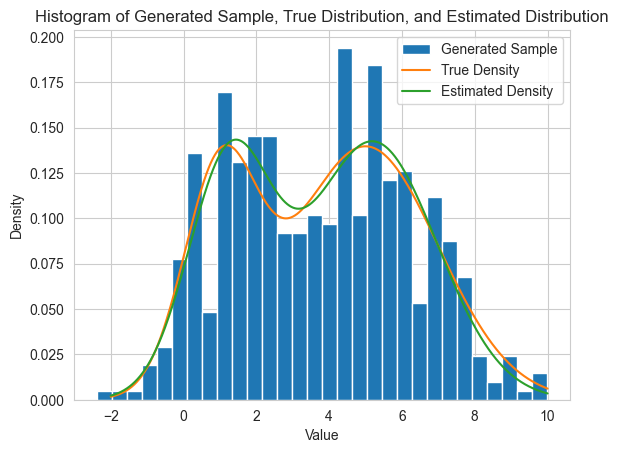

In [7]:
plt.hist(X, bins=30, density=True, label='Generated Sample')

plt.plot(x_range, true_density, label='True Density')

estimated_density = pi0_hat * norm.pdf(x_range, mu0_hat, sigma0_hat) + pi1_hat * norm.pdf(x_range, mu1_hat, sigma1_hat)
plt.plot(x_range, estimated_density, label='Estimated Density')

plt.title('Histogram of Generated Sample, True Distribution, and Estimated Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()
